In [1]:
import numpy as np

timesteps = [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 1050]
times_cpu_grouped = np.array(
    [2.37764573097229, 4.167035341262817, 4.794989347457886, 5.9812304973602295, 6.940406322479248, 8.005082130432129, 9.361287355422974, 10.484633445739746, 11.49392580986023, 13.383321285247803, 14.179618835449219, 14.924977779388428, 15.08379316329956, 18.462862253189087, 18.373361349105835, 18.920642614364624, 20.072700262069702, 21.692681312561035, 22.266981601715088, 23.53782057762146]
) / 100.0
times_cpu_no_grouping = np.array(
    [20.96375036239624, 32.66768789291382, 43.170175552368164, 45.167574405670166, 60.10641098022461, 67.07664895057678, 76.58293461799622, 94.89120054244995, 109.90562534332275, 117.76664686203003, 129.15615034103394, 129.4381194114685, 142.72101306915283, 166.86097645759583, 186.71179842948914, 184.86217069625854, 205.84374928474426, 219.43795657157898, 236.1528799533844, 241.39463877677917]
) / 100.0

# TODO
times_gpu_no_grouping = np.array(
    [27.71655559539795, 40.369263648986816, 49.681461572647095, 62.56184649467468, 72.7535309791565, 85.73726105690002, 95.43423366546631, 105.2545759677887, 120.86834526062012, 131.45924615859985, 144.6387701034546, 160.8962152004242, 173.19209456443787, 182.1107897758484, 198.47908759117126, 202.4956340789795, 206.90915417671204, 228.1290681362152, 244.52960085868835, 250.98422741889954]
) / 100.0

times_gpu_grouped = np.array(
    [1.3457400798797607, 1.6996455192565918, 2.1801202297210693, 2.6062753200531006, 3.3089473247528076, 4.798637866973877, 5.7078025341033936, 7.165719985961914, 8.150104522705078, 8.864483118057251, 8.712649583816528, 9.618905782699585, 10.275791501998901, 10.37578740119934, 10.434471368789673, 10.849903106689453, 11.113775253295898, 11.097021722793579, 11.286005210876465, 11.244333934783936]
) / 100.0

In [2]:
import matplotlib.pyplot as plt

import seaborn as sns

plt.style.use('seaborn-talk')
plt.style.use('ggplot')

from matplotlib import rc, rcParams
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42

# plt.rcParams.update({
#     "text.usetex": True})
# #     "font.family": "sans-serif",
# #     "font.sans-serif": ["Helvetica"]})
# rc('text.latex', preamble=r'\usepackage{color}')



In [3]:
from scipy.ndimage.filters import gaussian_filter


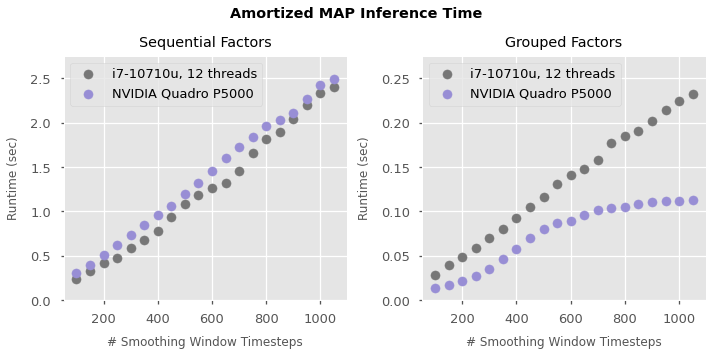

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

colors = sns.color_palette()

for i, (left, (cpu, gpu)) in enumerate(
    zip(ax, ((times_cpu_no_grouping, times_gpu_no_grouping), (times_cpu_grouped, times_gpu_grouped)))
):

    left.scatter(
        timesteps,
        gaussian_filter(cpu, sigma=0.7),
        color=colors[3],
        # label=r"\textbf{{GPU}} (Quadro P5000)"
        label=r"i7-10710u, 12 threads"
    )
    
    left.scatter(
        timesteps,
        gaussian_filter(gpu, sigma=0.7),
        color=colors[2],
        # label=r"\textbf{CPU} (i5-8250u)"
        label=r"NVIDIA Quadro P5000"
    )
    left.set_ylabel("Runtime (sec)", labelpad=10)
    left.set_xlabel("# Smoothing Window Timesteps", labelpad=10)

    # Row titles
    row_label = (
        r"Naive Factors"
        if i == 0 else
        r"Grouped Factors"
        # r"\begin{flushleft}Grouped\\Factors\end{flushleft}"
    )
    # left.annotate("\\textbf{" + row_label + "}", xy=(0, 0.5), xytext=(-left.yaxis.labelpad-10,10),
    #         xycoords=left.yaxis.label, textcoords='offset points',
    #         size='x-large', ha='left', va='center')
    # left.annotate(row_label.split(" ")[0], xy=(0, 0.5), xytext=(-left.yaxis.labelpad-10,10),
    #         xycoords=left.yaxis.label, textcoords='offset points',
    #         size='x-large', ha='left', va='center')
    # left.annotate(row_label.split(" ")[1], xy=(0, 0.5), xytext=(-left.yaxis.labelpad-10,-10),
    #         xycoords=left.yaxis.label, textcoords='offset points',
    #         size='x-large', ha='left', va='center')
    
    # Column titles
    # if i == 0:
    #     left.set_title(r"\textbf{CPU} (i5-8250u)", pad=15)
    #     left.set_title(r"\textbf{{GPU}} (Quadro P5000)", pad=15)
    # if i == 0:
    #     left.set_ylim(0, 300)
    #     left.set_ylim(0, 300)
    # else:
    #     left.set_ylim(0, 30)
    #     left.set_ylim(0, 30)
    
    left.legend()
    
    if i == 0:
        left.set_title("Sequential Factors", size="x-large", pad=10)
        left.set_ylim(0, 2.75)
    else:
        left.set_title("Grouped Factors", size="x-large", pad=10)
        left.set_ylim(0, 0.275)
fig.suptitle("Amortized MAP Inference Time", size="x-large", weight="bold")
fig.tight_layout()

plt.show()

fig.savefig("plot.pdf")

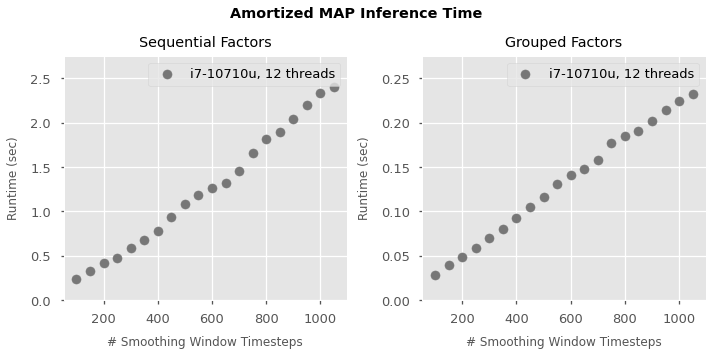

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

colors = sns.color_palette()

for i, (left, (cpu, gpu)) in enumerate(
    zip(ax, ((times_cpu_no_grouping, times_gpu_no_grouping), (times_cpu_grouped, times_gpu_grouped)))
):

    left.scatter(
        timesteps,
        gaussian_filter(cpu, sigma=0.7),
        color=colors[3],
        # label=r"\textbf{{GPU}} (Quadro P5000)"
        label=r"i7-10710u, 12 threads"
    )
    
    left.set_ylabel("Runtime (sec)", labelpad=10)
    left.set_xlabel("# Smoothing Window Timesteps", labelpad=10)

    # Row titles
    row_label = (
        r"Naive Factors"
        if i == 0 else
        r"Grouped Factors"
        # r"\begin{flushleft}Grouped\\Factors\end{flushleft}"
    )
    # left.annotate("\\textbf{" + row_label + "}", xy=(0, 0.5), xytext=(-left.yaxis.labelpad-10,10),
    #         xycoords=left.yaxis.label, textcoords='offset points',
    #         size='x-large', ha='left', va='center')
    # left.annotate(row_label.split(" ")[0], xy=(0, 0.5), xytext=(-left.yaxis.labelpad-10,10),
    #         xycoords=left.yaxis.label, textcoords='offset points',
    #         size='x-large', ha='left', va='center')
    # left.annotate(row_label.split(" ")[1], xy=(0, 0.5), xytext=(-left.yaxis.labelpad-10,-10),
    #         xycoords=left.yaxis.label, textcoords='offset points',
    #         size='x-large', ha='left', va='center')
    
    # Column titles
    # if i == 0:
    #     left.set_title(r"\textbf{CPU} (i5-8250u)", pad=15)
    #     left.set_title(r"\textbf{{GPU}} (Quadro P5000)", pad=15)
    # if i == 0:
    #     left.set_ylim(0, 300)
    #     left.set_ylim(0, 300)
    # else:
    #     left.set_ylim(0, 30)
    #     left.set_ylim(0, 30)
    
    left.legend()
    
    if i == 0:
        left.set_title("Sequential Factors", size="x-large", pad=10)
        left.set_ylim(0, 2.75)
    else:
        left.set_title("Grouped Factors", size="x-large", pad=10)
        left.set_ylim(0, 0.275)
fig.suptitle("Amortized MAP Inference Time", size="x-large", weight="bold")
fig.tight_layout()

plt.show()

fig.savefig("plot_no_gpu.pdf")

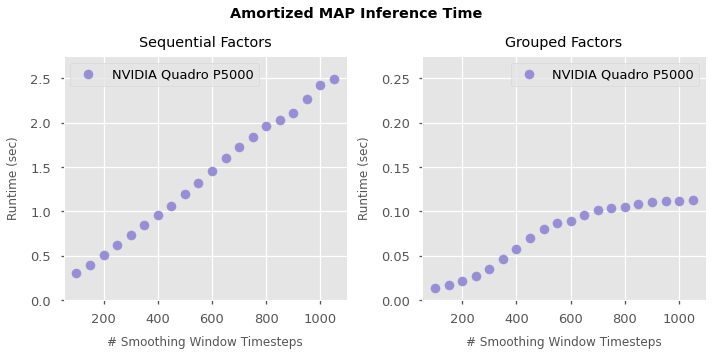

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

colors = sns.color_palette()

for i, (left, (cpu, gpu)) in enumerate(
    zip(ax, ((times_cpu_no_grouping, times_gpu_no_grouping), (times_cpu_grouped, times_gpu_grouped)))
):
    
    left.scatter(
        timesteps,
        gaussian_filter(gpu, sigma=0.7),
        color=colors[2],
        # label=r"\textbf{CPU} (i5-8250u)"
        label=r"NVIDIA Quadro P5000"
    )
    left.set_ylabel("Runtime (sec)", labelpad=10)
    left.set_xlabel("# Smoothing Window Timesteps", labelpad=10)

    # Row titles
    row_label = (
        r"Naive Factors"
        if i == 0 else
        r"Grouped Factors"
        # r"\begin{flushleft}Grouped\\Factors\end{flushleft}"
    )
    # left.annotate("\\textbf{" + row_label + "}", xy=(0, 0.5), xytext=(-left.yaxis.labelpad-10,10),
    #         xycoords=left.yaxis.label, textcoords='offset points',
    #         size='x-large', ha='left', va='center')
    # left.annotate(row_label.split(" ")[0], xy=(0, 0.5), xytext=(-left.yaxis.labelpad-10,10),
    #         xycoords=left.yaxis.label, textcoords='offset points',
    #         size='x-large', ha='left', va='center')
    # left.annotate(row_label.split(" ")[1], xy=(0, 0.5), xytext=(-left.yaxis.labelpad-10,-10),
    #         xycoords=left.yaxis.label, textcoords='offset points',
    #         size='x-large', ha='left', va='center')
    
    # Column titles
    # if i == 0:
    #     left.set_title(r"\textbf{CPU} (i5-8250u)", pad=15)
    #     left.set_title(r"\textbf{{GPU}} (Quadro P5000)", pad=15)
    # if i == 0:
    #     left.set_ylim(0, 300)
    #     left.set_ylim(0, 300)
    # else:
    #     left.set_ylim(0, 30)
    #     left.set_ylim(0, 30)
    
    left.legend()
    
    if i == 0:
        left.set_title("Sequential Factors", size="x-large", pad=10)
        left.set_ylim(0, 2.75)
    else:
        left.set_title("Grouped Factors", size="x-large", pad=10)
        left.set_ylim(0, 0.275)
fig.suptitle("Amortized MAP Inference Time", size="x-large", weight="bold")
fig.tight_layout()

plt.show()

fig.savefig("plot_no_cpu.pdf")
